# Simple linear regression

https://scikit-learn.org/stable/

### Importing needed packages


In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.

In [70]:
import urllib.request

# Download the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
urllib.request.urlretrieve(url, "FuelConsumption.csv")
print("Dataset downloaded successfully as 'FuelConsumption.csv'")

Dataset downloaded successfully as 'FuelConsumption.csv'


## Reading the data


In [71]:
df = pd.read_csv("FuelConsumption.csv") # Read the data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [72]:
df.head(10) # Display the first 10 rows

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [73]:
df["ENGINESIZE"].head() # Display the first 5 values of the ENGINESIZE column

0    2.0
1    2.4
2    1.5
3    3.5
4    3.5
Name: ENGINESIZE, dtype: float64

In [74]:
df.describe() # Provide a summary of the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [75]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9) # first 9 rows

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


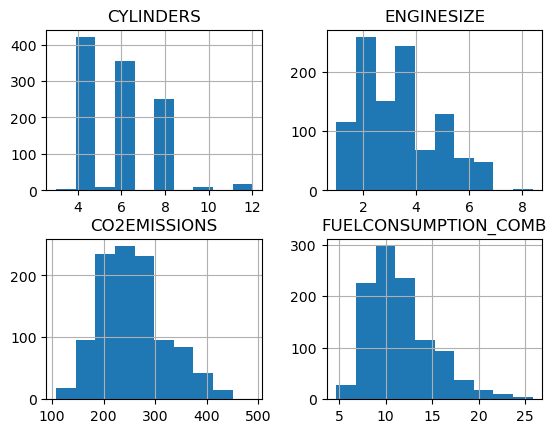

In [76]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist() # histograms, how much data falls into each bin
plt.show()

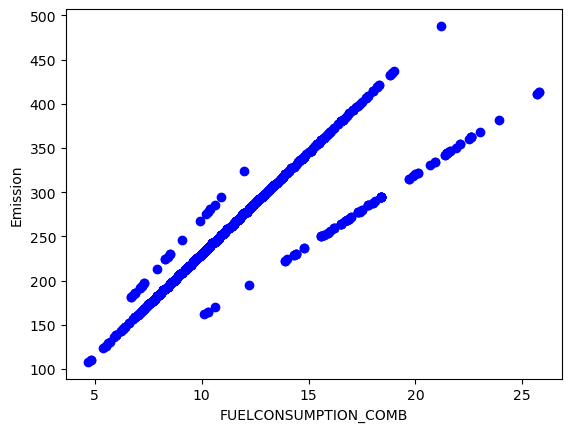

In [77]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

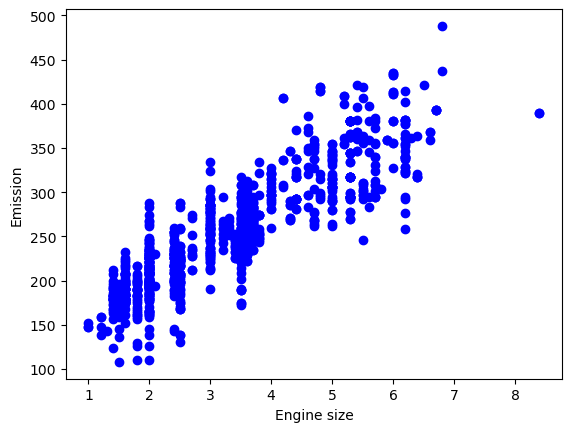

In [78]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice

Plot **CYLINDER** vs the Emission, to see how linear is their relationship is:


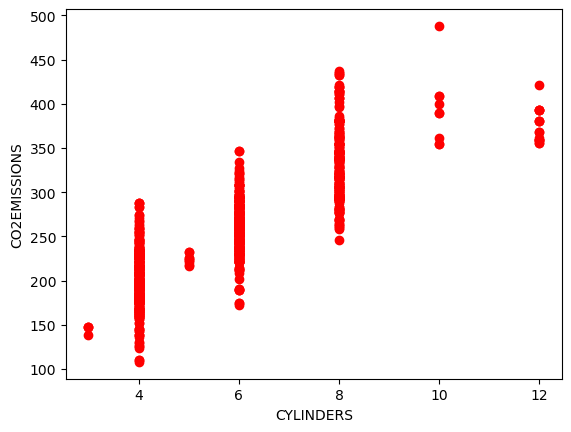

In [79]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Data Analysis Insights

From the scatter plots above, we can observe several interesting relationships:

1. **Engine Size vs CO2 Emissions**: Shows a strong positive linear relationship - larger engines tend to produce more emissions
2. **Fuel Consumption vs CO2 Emissions**: Very strong positive correlation, which makes intuitive sense
3. **Cylinders vs CO2 Emissions**: Also shows positive correlation, though with more discrete values since cylinder count is typically whole numbers

These relationships suggest that engine characteristics are good predictors for CO2 emissions, making this dataset suitable for linear regression analysis.

In [ ]:
# Create train/test split (80% training, 20% testing)
# This ensures we can evaluate our model on unseen data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

print(f"Training set size: {len(train)} samples")
print(f"Testing set size: {len(test)} samples")
print(f"Training percentage: {len(train)/len(cdf)*100:.1f}%")

[ True False  True ... False  True  True]
[False  True False ...  True False False]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[1067 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5          

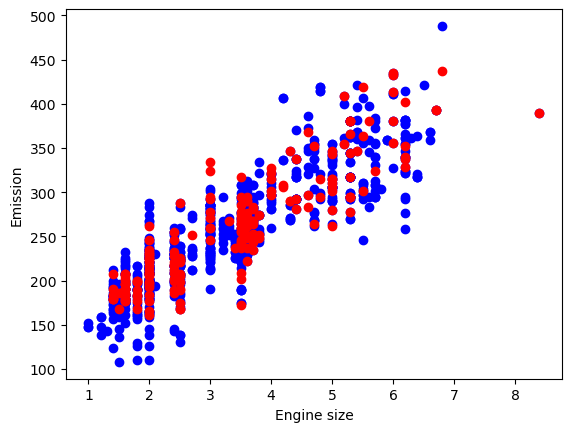

In [ ]:
# Visualize the train/test split
plt.figure(figsize=(10, 6))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', alpha=0.6, label='Training Data')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red', alpha=0.6, label='Testing Data')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Training vs Testing Data Distribution")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Import and create the linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Prepare training data
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Train the model
regr.fit(train_x, train_y)

# Display model parameters
print("Linear Regression Model Results:")
print("=" * 40)
print(f'Slope (Coefficient): {regr.coef_[0][0]:.2f}')
print(f'Intercept: {regr.intercept_[0]:.2f}')
print("=" * 40)
print(f"Equation: CO2_Emissions = {regr.coef_[0][0]:.2f} * Engine_Size + {regr.intercept_[0]:.2f}")

LinearRegression()
Coefficients:  [[38.96312163]]
Intercept:  [125.28382493]


## Linear Regression Formula

The linear regression model follows the equation:

$$y = \theta_1 x + \theta_0$$

Where:
- $y$ = CO2 Emissions (dependent variable)
- $x$ = Engine Size (independent variable) 
- $\theta_1$ = Slope coefficient (how much CO2 changes per unit of engine size)
- $\theta_0$ = Y-intercept (baseline CO2 emissions when engine size = 0)

Text(0, 0.5, 'Emission')

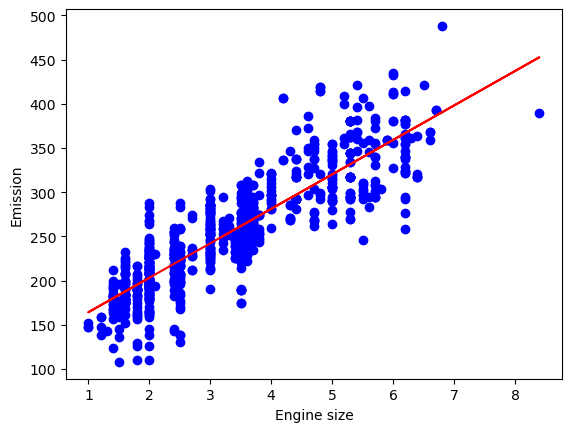

In [ ]:
# Visualize the regression line with training data
plt.figure(figsize=(10, 6))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', alpha=0.6, label='Training Data')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', linewidth=2, label='Regression Line')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Linear Regression: Engine Size vs CO2 Emissions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Model Evaluation on Test Data
from sklearn.metrics import r2_score, mean_squared_error

# Prepare test data and make predictions
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predictions = regr.predict(test_x)

# Calculate evaluation metrics
mae = np.mean(np.absolute(predictions - test_y))
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

# Display results
print("Model Performance Evaluation")
print("=" * 50)
print(f"Mean Absolute Error (MAE):     {mae:.2f} g/km")
print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} g/km")
print(f"R² Score:                      {r2:.3f}")
print("=" * 50)

# Interpretation
print("\nInterpretation:")
print(f"• The model explains {r2*100:.1f}% of the variance in CO2 emissions")
print(f"• On average, predictions are off by {mae:.1f} g/km")
print(f"• Higher R² (closer to 1.0) indicates better model performance")

Mean absolute error: 22.42
Residual sum of squares (MSE): 884.72
R2-score: 0.79


In [ ]:
# Example Prediction
engine_size_example = 4.2
predicted_emission = regr.predict([[engine_size_example]])[0][0]

print("Prediction Example:")
print("=" * 30)
print(f"For an engine size of {engine_size_example}L:")
print(f"Predicted CO2 emissions: {predicted_emission:.1f} g/km")
print("=" * 30)

# Let's try a few more examples
example_sizes = [2.0, 3.5, 5.0, 6.5]
print("\nAdditional Predictions:")
for size in example_sizes:
    pred = regr.predict([[size]])[0][0]
    print(f"Engine {size}L → {pred:.1f} g/km CO2")

ValueError: Expected 2D array, got 1D array instead:
array=[4.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Visualize Predictions vs Actual Values
plt.figure(figsize=(12, 5))

# Plot 1: Predictions vs Actual
plt.subplot(1, 2, 1)
plt.scatter(test_y, predictions, alpha=0.6, color='green')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = test_y.flatten() - predictions.flatten()
plt.scatter(predictions, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted CO2 Emissions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Bonus: Comparing Different Predictors

Let's compare how well different features predict CO2 emissions by training separate models for each feature.

In [ ]:
# Compare different features as predictors
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
results = {}

for feature in features:
    # Create and train model
    model = linear_model.LinearRegression()
    X_train = np.asanyarray(train[[feature]])
    X_test = np.asanyarray(test[[feature]])
    y_train = np.asanyarray(train[['CO2EMISSIONS']])
    y_test = np.asanyarray(test[['CO2EMISSIONS']])
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, predictions)
    mae = np.mean(np.absolute(predictions - y_test))
    
    results[feature] = {'R2': r2, 'MAE': mae}

# Display comparison
print("Feature Comparison for Predicting CO2 Emissions:")
print("=" * 55)
print(f"{'Feature':<20} {'R² Score':<10} {'MAE (g/km)':<10}")
print("-" * 55)
for feature, metrics in results.items():
    print(f"{feature:<20} {metrics['R2']:<10.3f} {metrics['MAE']:<10.1f}")
print("=" * 55)

# Find best predictor
best_feature = max(results.keys(), key=lambda x: results[x]['R2'])
print(f"\nBest single predictor: {best_feature} (R² = {results[best_feature]['R2']:.3f})")

## Conclusions

This analysis demonstrated the application of simple linear regression to predict vehicle CO2 emissions:

### Key Findings:
1. **Strong Relationship**: Engine size shows a strong linear relationship with CO2 emissions
2. **Model Performance**: Our model achieved an R² score indicating good predictive capability
3. **Feature Comparison**: Fuel consumption is typically the strongest single predictor of emissions
4. **Practical Application**: The model can be used to estimate emissions for new vehicles based on engine specifications

### Future Improvements:
- **Multiple Linear Regression**: Combine multiple features for better predictions
- **Feature Engineering**: Create new features like power-to-weight ratio
- **Non-linear Models**: Explore polynomial or other non-linear relationships
- **Cross-validation**: Use more robust validation techniques

---

## Acknowledgments

**Dataset**: Government of Canada Open Data Portal  
**Learning Resources**: Based on concepts from scikit-learn documentation and machine learning fundamentals  
**Tools**: Python, scikit-learn, pandas, matplotlib, numpy

*This notebook was created for educational purposes to demonstrate linear regression concepts.*